# Migration simulation in EU - data analysis

__Data origin__ <br>
Data was gathered especially from EU reports and then saved in .csv format.

In [1]:
import pandas as pd

def read_data_from_csv(filename: str,
                       index_col: str) -> pd.DataFrame:
    return pd.read_csv('data/' + filename + '.csv', sep=';', index_col=index_col)

## Population
Number of people who live in each EU country.
    - Max value: 82162000 [Germany]
    - Min value: 434403 [Malta]

In [2]:
df_population = read_data_from_csv(filename='population', index_col='Country')
df_population.plot(kind='bar', title="Population", figsize=(10, 5), legend=True, fontsize=10)

To keep relation between different countries and number of citizens I have decided to choose agent's origin country with the probability (calculated for each country):

$$\frac{\text{number of people in selected country}}{\text{number of people in all countries}}$$

Below dataframe shows probabilities for some randomly choosen countries:

In [3]:
display((df_population / df_population.sum()).sample(5))

,Population
Country,
Malta,0.000852
Finland,0.010756
Estonia,0.002580
Greece,0.021138
Netherlands,0.033282


## Immigrants
Number of immigrants in each EU country.
    - Max value: 9845244 [Germany]
    - Min value: 20289 [Malta]

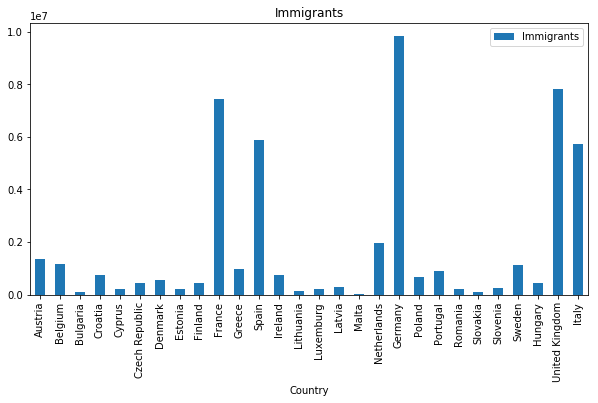

In [4]:
df_immigrants = read_data_from_csv(filename='immigrants', index_col='Country')
df_immigrants.plot(kind='bar', title="Immigrants", figsize=(10, 5), legend=True, fontsize=10)

## Relation between population and immigrants

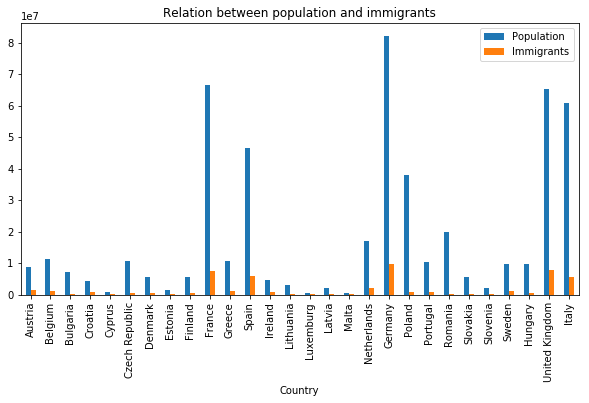

In [5]:
df_relation = pd.concat([df_population, df_immigrants], axis=1, sort=False)
df_relation.plot(kind='bar', title="Relation between population and immigrants", figsize=(10, 5), legend=True,
                 fontsize=10)

## How many people in selected country are immigrants?
As some of the features are appropriate only for immigrants, it will be useful to keep this information. <br>
Below dataframe shows the probability of being an immigrants in selected country at the beggining of simulation.

In [6]:
df_immigrants_to_population = pd.DataFrame(
    df_immigrants['Immigrants'] / (df_immigrants['Immigrants'] + df_population['Population']),
    columns=['Immigrants propability'])
display(df_immigrants_to_population.sample(5))

,Immigrants propability
Country,
Hungary,0.043738
Latvia,0.125625
Belgium,0.093159
Finland,0.075237
Netherlands,0.103722
